<a href="https://colab.research.google.com/github/hysophie/project_dynamic/blob/master/Modeling_Robin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
pip install pygam

     |████████████████████████████████| 1.8MB 2.9MB/s 


In [0]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import copy
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from pygam.pygam import LinearGAM, s, f, GAM

In [0]:
with open('/content/gdrive/My Drive/DynamicPricing_Final.pickle', 'rb') as f:
   data = pickle.load(f)

1. DNN MODEL

In [0]:
data = data.drop(data.columns[21:-5], axis=1)
data = pd.concat([pd.DataFrame(StandardScaler().fit_transform(data.iloc[:,:-1]), columns=data.columns[:-1]),
                 pd.DataFrame(data['y'].values, columns=['y'])],axis=1)

In [9]:
X_vari = data.iloc[:,:-1].as_matrix()
y_vari = tf.one_hot(data.iloc[:,-1].astype('int64'), depth=2)

sess = tf.Session()
sess.run

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<bound method BaseSession.run of <tensorflow.python.client.session.Session object at 0x7f66ac8aca20>>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_vari, y_vari.eval(session=sess), test_size=.3, random_state=42)

In [0]:
start = time.time()

training_epochs = 10
batch_size = 300

ncol= X_vari.shape[1]
numofy = 2

X = tf.placeholder(tf.float32, [None, ncol])
y = tf.placeholder(tf.float32, [None, numofy])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([ncol, 15]))
b1 = tf.Variable(tf.random_normal([15]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.Variable(tf.random_normal([15, 7]))
b2 = tf.Variable(tf.random_normal([7]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.Variable(tf.random_normal([7, 2]))
b3 = tf.Variable(tf.random_normal([2]))

hypothesis = tf.sigmoid(tf.matmul(L2, W3) + b3)

cost = -tf.reduce_mean(y*tf.log(hypothesis+1e-4) + (1-y)*tf.log(1-hypothesis+1e-4))
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(X_train) / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = X_train[batch_size*i:batch_size*(i+1)], y_train[batch_size*i:batch_size*(i+1)]
        feed_dict = {X: batch_xs, y: batch_ys, keep_prob : .7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print("Epoch:", "%04d" % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: X_test, y: y_test, keep_prob: 1}))

print("time :", time.time() - start)

Epoch: 0001 cost = 0.597214415
Epoch: 0002 cost = 0.594495484
Epoch: 0003 cost = 0.596664515
Epoch: 0004 cost = 0.596411388
Epoch: 0005 cost = 0.595958434
Epoch: 0006 cost = 0.597607554
Epoch: 0007 cost = 0.596435989
Epoch: 0008 cost = 0.597470662
Epoch: 0009 cost = 0.596948889
Epoch: 0010 cost = 0.596946597
Accuracy: 0.7321788
time : 68.48209977149963


# **Regression Approach**

2. OLS Regression Model

In [0]:
with open('/content/gdrive/My Drive/Chan.pickle', 'rb') as f:
   data_chan = pickle.load(f)

In [0]:
X_linear = data_chan.drop(data_chan.columns[21:-5], axis=1)
X_linear = X_linear.iloc[:,:-1]
y_linear = pd.DataFrame(data_chan.iloc[:,-1])

X_lin_tr, X_lin_te, y_lin_tr, y_lin_te = train_test_split(X_linear, y_linear, test_size=.3, random_state=42)

linear = LinearRegression().fit(X_lin_tr, y_lin_tr)

In [213]:
linear.score(X_lin_te, y_lin_te)

0.09442613251049126

In [214]:
mean_squared_error(linear.predict(X_lin_te), y_lin_te)

389.2977829182152

3. PLS Regression Model

In [0]:
data_chan = data_chan.drop(data_chan.columns[21:-5], axis=1)
data_chan = pd.concat([pd.DataFrame(StandardScaler().fit_transform(data_chan.iloc[:,:-1]), columns=data_chan.columns[:-1]),
                 pd.DataFrame(data_chan['y'].values, columns=['y'])],axis=1)

In [0]:
X_vari2 = data_chan.iloc[:,:-1]
y_vari2 = pd.DataFrame(data_chan.iloc[:,-1])

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_vari2, y_vari2, test_size=.3, random_state=42)

In [19]:
num_of_axis = {'n_components': [1,2,3,4,5,6,7]}

pls_fitting = GridSearchCV(PLSRegression(scale=False), num_of_axis, cv=5)
pls_fitting.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=PLSRegression(copy=True, max_iter=500, n_components=2,
                                     scale=False, tol=1e-06),
             iid='warn', n_jobs=None,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
pls_fitting.score(X_test2, y_test2)

0.09437537299500087

In [29]:
mean_squared_error(pls_fitting.predict(X_test2), y_test2)

389.3196039618118

4. Lasso Regression Model

In [24]:
Lasso_param = {'alpha': [0.01, 0.1, 1, 10, 100]}
Lasso_fitting = GridSearchCV(Lasso(random_state=42, fit_intercept=True), Lasso_param, cv=5)
Lasso_fitting.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
Lasso_fitting.score(X_test2, y_test2)

0.0944157389696133

In [26]:
mean_squared_error(Lasso_fitting.predict(X_test2), y_test2)

389.3022510047686

5. Generative Additive Model (Non-linear)

In [30]:
#GAM Model에 쓰려고, 단순히 feature importance 참고하려는 의도

Xgb_fitting = XGBRegressor(random_state=42, tree_method='gpu_hist')
Xgb_fitting.fit(X_train2, y_train2)
Xgb_fitting.feature_importances_  #3,8,16,17,21

[14:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.04376948, 0.00787022, 0.02863281, 0.1699906 , 0.        ,
       0.00293444, 0.00147636, 0.00189212, 0.1985173 , 0.01133583,
       0.00368999, 0.00104403, 0.00526056, 0.        , 0.        ,
       0.        , 0.12838584, 0.11567714, 0.03977399, 0.02760838,
       0.00172213, 0.20110919, 0.00216963, 0.00147295, 0.00566706],
      dtype=float32)

In [0]:
data_gam = data_chan.drop(data_chan.columns[21:-5], axis=1)
X_gam = data_gam.iloc[:,[3,8,16,17,21]]
y_gam = pd.DataFrame(data_gam.iloc[:,-1])

In [0]:
#지속적인 Colab 메모리 에러로, 데이터를 불가피하게 반으로 줄였음 (메모리 한계)
X_gam_half, X_another, y_gam_half, y_another = train_test_split(X_gam, y_gam, test_size=.3, random_state=42)

In [0]:
#0, 4 index에 대해선 factor처리 하고 싶었으나, 버전이 업데이트 되면서 dtype에 대한 paramter가 사라진 것으로 보임
#해당 변수의 최소 최대를 벗어나는, 다른 변수의 값에 대해서는 자꾸 오류를 띄움 (분명 해결책이 있을텐데, 못 찾음..)
#range 오류를 해결할 수가 없어서 0, 4 index에 대해서도 연속형으로 생각해서 spline 모델을 사용

gam_model = LinearGAM(s(0) + s(1) + s(2) + s(3)+ s(4))
gam_model.gridsearch(X_gam_half.as_matrix(),y_gam_half.as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

In [0]:
gam_model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     51.2342
Link Function:                     IdentityLink Log Likelihood:                              -8720290.1197
Number of Samples:                      1269297 AIC:                                         17440684.7076
                                                AICc:                                         17440684.712
                                                GCV:                                              383.7551
                                                Scale:                                            383.7272
                                                Pseudo R-Squared:                                    0.102
Feature Function                  Lam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [0]:
mean_squared_error(gam_model.predict(X_another), y_another)

384.5970435808062

<Figure size 2160x576 with 0 Axes>

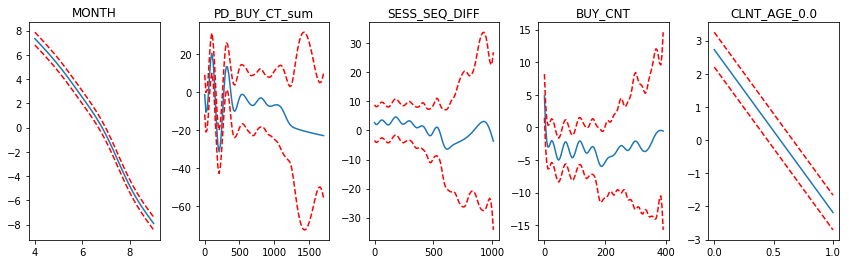

In [0]:
plt.figure(figsize=(30,8))
fig, axs = plt.subplots(1,5)
plt.subplots_adjust(right = 2, wspace = .3)

titles = X_gam.columns[0:5]
for i, ax in enumerate(axs):
    gam_grid = gam_model.generate_X_grid(term=i)
    ax.plot(gam_grid[:, i], gam_model.partial_dependence(term=i, X=gam_grid))
    ax.plot(gam_grid[:, i], gam_model.partial_dependence(term=i, X=gam_grid, width=.95)[1], c='r', ls='--')
    
    
    ax.set_title(titles[i]);

Text(0.5, 1.0, 'MONTH')

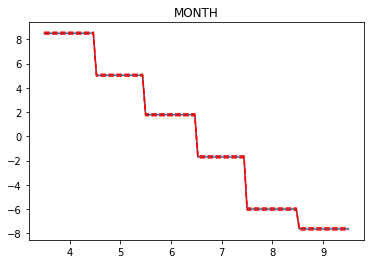

In [0]:
gam_model_f0 = LinearGAM(f(0))
gam_model_f0.gridsearch(X_gam_half.as_matrix(),y_gam_half.as_matrix())a

gam_grid2 = gam_model_f0.generate_X_grid(term=0)    
plt.plot(gam_grid[:,0], gam_model_f0.partial_dependence(term=0, X=gam_grid))
plt.plot(gam_grid[:,0], gam_model_f0.partial_dependence(term=0, X=gam_grid, width=.95)[1], c='r', ls='--')
plt.title(X_gam.columns[0])

Simpler한 모델을 통해 확인해보고자.

In [42]:
gam_model2 = LinearGAM(s(0, n_splines=5) + s(1, n_splines=5) + s(2, n_splines=5) + s(3, n_splines=5)+ s(4, n_splines=5))
gam_model2.gridsearch(X_gam_half.as_matrix(),y_gam_half.as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
100% (11 of 11) |########################| Elapsed Time: 0:03:31 Time:  0:03:31


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + intercept, tol=0.0001, 
   verbose=False)

<Figure size 2160x576 with 0 Axes>

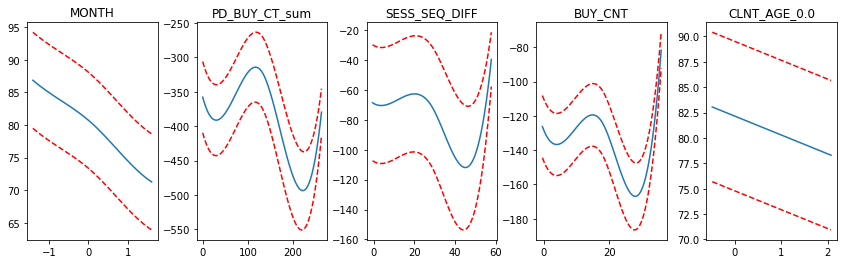

In [44]:
plt.figure(figsize=(30,8))
fig, axs = plt.subplots(1,5)
plt.subplots_adjust(right = 2, wspace = .3)

titles = X_gam.columns[0:5]
for i, ax in enumerate(axs):
    gam_grid = gam_model2.generate_X_grid(term=i)
    ax.plot(gam_grid[:, i], gam_model2.partial_dependence(term=i, X=gam_grid))
    ax.plot(gam_grid[:, i], gam_model2.partial_dependence(term=i, X=gam_grid, width=.95)[1], c='r', ls='--')
    
    
    ax.set_title(titles[i]);

In [46]:
gam_model2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      17.793
Link Function:                     IdentityLink Log Likelihood:                              -8730002.6642
Number of Samples:                      1269297 AIC:                                         17460042.9144
                                                AICc:                                         17460042.915
                                                GCV:                                              386.6883
                                                Scale:                                            386.6785
                                                Pseudo R-Squared:                                   0.0951
Feature Function                  Lam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


텐서보드 이용 시도... but 실패...

In [0]:
#텐서보드 이용 실패...
#model 

with tf.name_scope('layer1') as scope:
  W1 = tf.Variable(tf.random_normal([ncol, 15]))
  b1 = tf.Variable(tf.random_normal([15]))
  L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
  L1 = tf.nn.dropout(L1, keep_prob = keep_prob)
  
  tf.summary.histogram('X', X)
  tf.summary.histogram('weights1', W1)
  tf.summary.histogram('bias1', b1)
  tf.summary.histogram('layer1', L1)
  
with tf.name_scope('layer2') as scope:
  W2 = tf.Variable(tf.random_normal([15, 7]))
  b2 = tf.Variable(tf.random_normal([7]))
  L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
  L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

  tf.summary.histogram('L1', L1)
  tf.summary.histogram('weights2', W2)
  tf.summary.histogram('bias2', b2)
  tf.summary.histogram('layer2', L2)
  
with tf.name_scope('layer2') as scope:
  
  W3 = tf.Variable(tf.random_normal([7, 2]))
  b3 = tf.Variable(tf.random_normal([2]))
  hypothesis = tf.sigmoid(tf.matmul(L2, W3) + b3)
  
  tf.summary.histogram('L2', L2)
  tf.summary.histogram('weight3', W3)
  tf.summary.histogram('bias3', b3)
  tf.summary.histogram('hypothesis', hypothesis)
  
summary = tf.summary.merge_all()


with tf.Session() as sess:
  writer = tf.summary.FileWriter('/content/gdrive/My Drive/Tensor', sess.graph)
  sess.run(summary)
  writer.close()


#sess=tf.Session()
#sess.run(tf.global_variables_initializer())

#writer = tf.summary.FileWriter('/content/gdrive/My Drive/Tensor', sess.graph)
#writer.add_graph(sess.graph)

